<a href="https://colab.research.google.com/github/juliosdutra/ModelagemPPEQ1019/blob/main/FTIR_simulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## **Passo a Passo para Simular a Base de Dados**

### 1. **Entendendo as Fibras Naturais**
   - **Fibras Vegetais**: Exemplos incluem fibras de coco, sisal, juta, curauá, bambu, etc.
   - **Composição Química**: As fibras vegetais são compostas principalmente de celulose, hemicelulose, lignina e pectina.
   - **Propriedades Termomecânicas**: Incluem resistência à tração, módulo de elasticidade, condutividade térmica, entre outras.

---

### 2. **Simulação dos Espectros FTIR**
   - **Picos Característicos**:
     - **Celulose**: Picos em ~3300 cm⁻¹ (O-H), ~2900 cm⁻¹ (C-H), ~1050 cm⁻¹ (C-O).
     - **Hemicelulose**: Picos em ~1730 cm⁻¹ (C=O), ~1240 cm⁻¹ (C-O).
     - **Lignina**: Picos em ~1600 cm⁻¹ (C=C aromático), ~1500 cm⁻¹ (C-H).
   - **Variação**: A intensidade e posição dos picos podem variar dependendo da composição da fibra.

---

### 3. **Simulação das Propriedades Termomecânicas**
   - **Resistência à Tração**: Pode variar de 50 a 1000 MPa, dependendo da fibra.
   - **Módulo de Elasticidade**: Pode variar de 1 a 50 GPa.
   - **Condutividade Térmica**: Pode variar de 0,1 a 0,5 W/m·K.

---

### 4. **Exemplo de Código em Python**

Aqui está um exemplo de como simular uma base de dados de FTIR e propriedades termomecânicas:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configurações
num_amostras = 100  # Número de amostras
num_pontos = 1000   # Número de pontos no eixo x (número de onda)
wave_numbers = np.linspace(400, 4000, num_pontos)  # Faixa de números de onda (400-4000 cm⁻¹)

# Função para criar um pico Gaussiano
def gaussian_peak(x, center, height, width):
    return height * np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Gerar espectros sintéticos
spectra = np.zeros((num_amostras, num_pontos))

# Picos característicos das fibras vegetais
picos_celulose = [(3300, 0.8, 50), (2900, 0.6, 30), (1050, 0.7, 40)]
picos_hemicelulose = [(1730, 0.5, 20), (1240, 0.4, 25)]
picos_lignina = [(1600, 0.6, 35), (1500, 0.5, 30)]

for i in range(num_amostras):
    # Adicionar picos de celulose
    for center, height, width in picos_celulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)
    
    # Adicionar picos de hemicelulose
    for center, height, width in picos_hemicelulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)
    
    # Adicionar picos de lignina
    for center, height, width in picos_lignina:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)
    
    # Adicionar ruído
    noise = np.random.normal(0, 0.02, num_pontos)  # Ruído aleatório
    spectra[i] += noise

# Gerar propriedades termomecânicas sintéticas
resistencia_tracao = np.random.uniform(50, 1000, num_amostras)  # Resistência à tração (MPa)
modulo_elasticidade = np.random.uniform(1, 50, num_amostras)    # Módulo de elasticidade (GPa)
condutividade_termica = np.random.uniform(0.1, 0.5, num_amostras)  # Condutividade térmica (W/m·K)

# Plotar alguns espectros
plt.figure(figsize=(10, 6))
for i in range(5):  # Plotar as primeiras 5 amostras
    plt.plot(wave_numbers, spectra[i], label=f"Amostra {i+1}")
plt.title("Espectros FTIR Simulados de Fibras Vegetais")
plt.xlabel("Número de Onda (cm⁻¹)")
plt.ylabel("Absorbância")
plt.legend()
plt.grid()
plt.show()

# Criar DataFrame
df = pd.DataFrame(spectra, columns=[f"wave_{int(w)}" for w in wave_numbers])
df["resistencia_tracao"] = resistencia_tracao
df["modulo_elasticidade"] = modulo_elasticidade
df["condutividade_termica"] = condutividade_termica

# Salvar em CSV
df.to_csv("ftir_fibras_naturais.csv", index=False)
print("Dados simulados salvos em 'ftir_fibras_naturais.csv'.")
```

---

### 5. **Explicação do Código**
   - **Espectros FTIR**: Foram simulados picos característicos de celulose, hemicelulose e lignina.
   - **Propriedades Termomecânicas**: Foram geradas aleatoriamente dentro de faixas típicas para fibras vegetais.
   - **Ruído**: Adicionado para simular variações experimentais.
   - **Salvamento**: Os dados foram salvos em um arquivo CSV para uso futuro.

---

### 6. **Próximos Passos**
   Com os dados simulados, você pode:
   - **Pré-processar os espectros**: Aplicar técnicas como SNV, derivadas, ou correção de linha de base.
   - **Treinar modelos**: Usar PLSR, Random Forest, ou redes neurais para prever as propriedades termomecânicas.
   - **Avaliar o modelo**: Calcular métricas como R² e RMSE.

---

### 7. **Limitações dos Dados Simulados**
   - **Falta de Realismo**: Dados simulados não capturam completamente a complexidade de espectros reais.
   - **Aplicação Limitada**: São úteis para testes, mas modelos treinados com dados simulados podem não generalizar bem para dados reais.

---

### 8. **Alternativa: Dados Reais**
Se você preferir trabalhar com dados reais, aqui estão algumas sugestões:
   - **Publicações Científicas**: Procure artigos que tenham estudado fibras vegetais brasileiras e verifique se os dados estão disponíveis.
   - **Instituições de Pesquisa**: Entre em contato com universidades ou institutos de pesquisa que trabalham com fibras naturais.
   - **Bases de Dados Públicas**: Verifique se há dados disponíveis em plataformas como o [NIST Chemistry WebBook](https://webbook.nist.gov/chemistry/) ou [SDBS](https://sdbs.db.aist.go.jp/).

---

Se precisar de mais ajuda ou quiser explorar outras técnicas, é só avisar! 😊

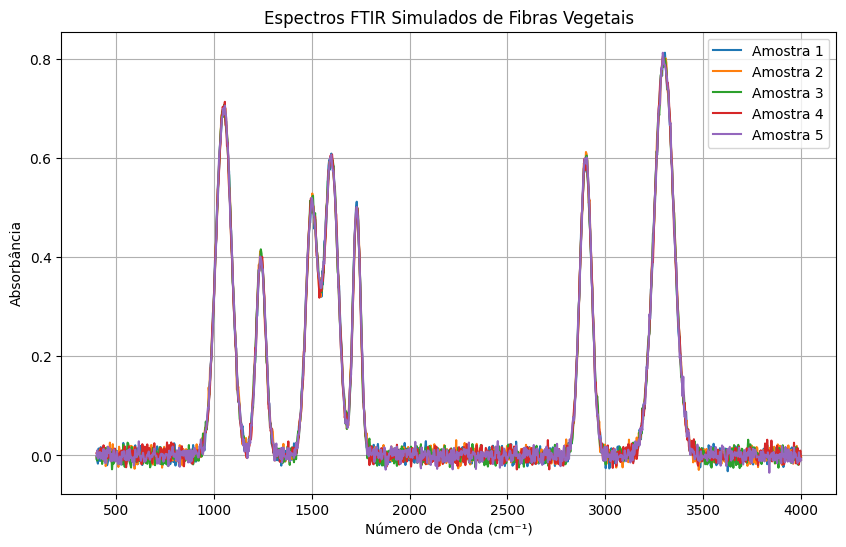

Dados simulados salvos em 'ftir_fibras_naturais.csv'.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configurações
num_amostras = 100  # Número de amostras
num_pontos = 1000   # Número de pontos no eixo x (número de onda)
wave_numbers = np.linspace(400, 4000, num_pontos)  # Faixa de números de onda (400-4000 cm⁻¹)

# Função para criar um pico Gaussiano
def gaussian_peak(x, center, height, width):
    return height * np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Gerar espectros sintéticos
spectra = np.zeros((num_amostras, num_pontos))

# Picos característicos das fibras vegetais
picos_celulose = [(3300, 0.8, 50), (2900, 0.6, 30), (1050, 0.7, 40)]
picos_hemicelulose = [(1730, 0.5, 20), (1240, 0.4, 25)]
picos_lignina = [(1600, 0.6, 35), (1500, 0.5, 30)]

for i in range(num_amostras):
    # Adicionar picos de celulose
    for center, height, width in picos_celulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)

    # Adicionar picos de hemicelulose
    for center, height, width in picos_hemicelulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)

    # Adicionar picos de lignina
    for center, height, width in picos_lignina:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)

    # Adicionar ruído
    noise = np.random.normal(0, 0.01, num_pontos)  # Ruído aleatório
    spectra[i] += noise

# Gerar propriedades termomecânicas sintéticas
resistencia_tracao = np.random.uniform(50, 1000, num_amostras)  # Resistência à tração (MPa)
modulo_elasticidade = np.random.uniform(1, 50, num_amostras)    # Módulo de elasticidade (GPa)
condutividade_termica = np.random.uniform(0.1, 0.5, num_amostras)  # Condutividade térmica (W/m·K)

# Plotar alguns espectros
plt.figure(figsize=(10, 6))
for i in range(5):  # Plotar as primeiras 5 amostras
    plt.plot(wave_numbers, spectra[i], label=f"Amostra {i+1}")
plt.title("Espectros FTIR Simulados de Fibras Vegetais")
plt.xlabel("Número de Onda (cm⁻¹)")
plt.ylabel("Absorbância")
plt.legend()
plt.grid()
plt.show()

# Criar DataFrame
df = pd.DataFrame(spectra, columns=[f"wave_{int(w)}" for w in wave_numbers])
df["resistencia_tracao"] = resistencia_tracao
df["modulo_elasticidade"] = modulo_elasticidade
df["condutividade_termica"] = condutividade_termica

# Salvar em CSV
df.to_csv("ftir_fibras_naturais.csv", index=False)
print("Dados simulados salvos em 'ftir_fibras_naturais.csv'.")

In [2]:
df

,wave_400,wave_403,wave_407,wave_410,wave_414,wave_418,wave_421,wave_425,wave_428,wave_432,...,wave_3978,wave_3981,wave_3985,wave_3989,wave_3992,wave_3996,wave_4000,resistencia_tracao,modulo_elasticidade,condutividade_termica
0,-0.023815,0.042276,0.000455,0.005795,-0.013810,-0.033676,0.010901,0.015065,0.005081,0.012388,...,0.013017,0.019463,0.005482,0.000446,-0.024732,-0.022734,-0.011884,583.845491,21.529747,0.380023
1,-0.031255,0.021937,0.008653,-0.015739,-0.055864,-0.019874,-0.005260,0.039150,-0.004291,0.004556,...,-0.013613,0.018407,0.024645,0.004476,0.019008,0.018827,0.005220,159.337554,6.499778,0.164933
2,0.012215,0.025369,-0.014498,0.035476,-0.008975,-0.022472,0.018750,-0.014664,0.005862,-0.004998,...,-0.018670,-0.015242,-0.022655,-0.014232,0.002162,-0.018828,0.021290,861.718413,39.790116,0.389858
3,0.017132,0.009017,0.006519,-0.006309,0.012238,0.030418,-0.008321,-0.013753,-0.017903,0.020777,...,0.005226,0.008505,-0.011963,-0.000654,-0.013950,-0.027988,0.005208,935.772923,16.073973,0.484485
4,-0.010939,0.049661,-0.014660,0.004308,0.052368,0.027430,0.011096,0.039425,0.002268,0.024652,...,-0.022634,-0.009596,-0.023130,-0.022003,0.009590,-0.026746,-0.027957,714.476671,10.015633,0.271676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.016167,0.029303,0.016166,-0.009159,-0.008066,-0.005360,-0.013112,-0.015951,0.023245,-0.003748,...,-0.011341,-0.008045,-0.016035,0.009541,0.046279,0.005244,-0.008069,275.098815,41.178819,0.418171
96,-0.001537,0.037325,-0.003006,0.017600,0.011426,0.009076,0.014770,-0.005756,-0.006923,0.005914,...,0.005843,-0.023309,0.008269,0.005490,0.010939,-0.002879,0.009242,421.844357,24.600843,0.430862
97,0.022285,0.014592,0.000548,0.021822,0.009307,-0.015872,-0.035206,-0.010397,-0.022916,0.000424,...,0.002568,-0.001827,0.034626,-0.028483,0.008073,-0.031619,0.017702,621.721033,36.850586,0.268266
98,-0.047348,0.017051,0.033976,0.017466,-0.029906,0.041641,-0.012283,-0.010918,0.022379,-0.015570,...,0.018190,-0.004662,0.000164,0.012104,-0.002678,0.006179,-0.012473,619.880527,26.692977,0.215265


Estratégia para Correlacionar Propriedades Termomecânicas com os Picos
Resistência à Tração:

Pode estar relacionada à intensidade dos picos de celulose (grupos -OH e C-O), já que a celulose é um dos principais componentes que conferem resistência às fibras vegetais.

Módulo de Elasticidade:

Pode estar relacionado à intensidade dos picos de lignina (grupos aromáticos), pois a lignina contribui para a rigidez das fibras.

Condutividade Térmica:

Pode estar relacionada à intensidade dos picos de hemicelulose (grupos C=O), já que a hemicelulose influencia a estrutura e a condução de calor.

Código Atualizado
Aqui está o código atualizado para criar uma correlação entre as propriedades termomecânicas e os picos dos espectros:

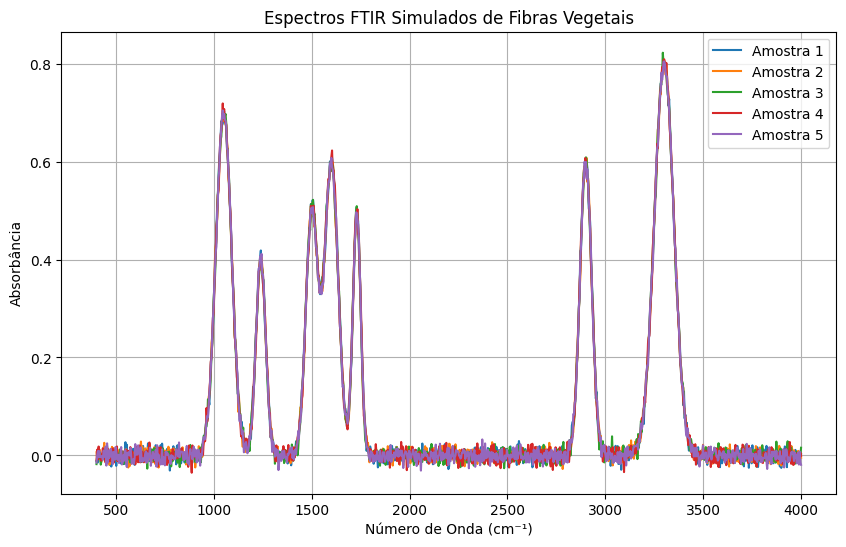

Dados simulados salvos em 'ftir_fibras_naturais.csv'.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configurações
num_amostras = 100  # Número de amostras
num_pontos = 1000   # Número de pontos no eixo x (número de onda)
wave_numbers = np.linspace(400, 4000, num_pontos)  # Faixa de números de onda (400-4000 cm⁻¹)

# Função para criar um pico Gaussiano
def gaussian_peak(x, center, height, width):
    return height * np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Gerar espectros sintéticos
spectra = np.zeros((num_amostras, num_pontos))

# Picos característicos das fibras vegetais
picos_celulose = [(3300, 0.8, 50), (2900, 0.6, 30), (1050, 0.7, 40)]
picos_hemicelulose = [(1730, 0.5, 20), (1240, 0.4, 25)]
picos_lignina = [(1600, 0.6, 35), (1500, 0.5, 30)]

# Variáveis para armazenar as intensidades dos picos
intensidade_celulose = np.zeros(num_amostras)
intensidade_hemicelulose = np.zeros(num_amostras)
intensidade_lignina = np.zeros(num_amostras)

for i in range(num_amostras):
    # Adicionar picos de celulose
    for center, height, width in picos_celulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)
        intensidade_celulose[i] += height  # Soma das intensidades dos picos de celulose

    # Adicionar picos de hemicelulose
    for center, height, width in picos_hemicelulose:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)
        intensidade_hemicelulose[i] += height  # Soma das intensidades dos picos de hemicelulose

    # Adicionar picos de lignina
    for center, height, width in picos_lignina:
        spectra[i] += gaussian_peak(wave_numbers, center, height, width)
        intensidade_lignina[i] += height  # Soma das intensidades dos picos de lignina

    # Adicionar ruído
    noise = np.random.normal(0, 0.01, num_pontos)  # Ruído aleatório
    spectra[i] += noise

# Gerar propriedades termomecânicas sintéticas com base nas intensidades dos picos
resistencia_tracao = 50 + intensidade_celulose * 1000  # Resistência à tração (MPa)
modulo_elasticidade = 1 + intensidade_lignina * 50     # Módulo de elasticidade (GPa)
condutividade_termica = 0.1 + intensidade_hemicelulose * 0.4  # Condutividade térmica (W/m·K)

# Plotar alguns espectros
plt.figure(figsize=(10, 6))
for i in range(5):  # Plotar as primeiras 5 amostras
    plt.plot(wave_numbers, spectra[i], label=f"Amostra {i+1}")
plt.title("Espectros FTIR Simulados de Fibras Vegetais")
plt.xlabel("Número de Onda (cm⁻¹)")
plt.ylabel("Absorbância")
plt.legend()
plt.grid()
plt.show()

# Criar DataFrame
df = pd.DataFrame(spectra, columns=[f"wave_{int(w)}" for w in wave_numbers])
df["resistencia_tracao"] = resistencia_tracao
df["modulo_elasticidade"] = modulo_elasticidade
df["condutividade_termica"] = condutividade_termica

# Salvar em CSV
df.to_csv("ftir_fibras_naturais.csv", index=False)
print("Dados simulados salvos em 'ftir_fibras_naturais.csv'.")

Você levantou pontos muito importantes! Para tornar a simulação mais realista, podemos:

**Adicionar incertezas aos picos característicos**: Variar os valores de center, height e width dos picos para simular diferenças entre fibras vegetais.

**Correlacionar as propriedades termomecânicas com as incertezas dos espectros**: Garantir que as propriedades termomecânicas variem de acordo com as características dos espectros, refletindo as diferenças entre fibras como coco, sisal, juta, curauá, bambu, etc.

Vou ajustar o código para incorporar essas melhorias.

**Código Atualizado**

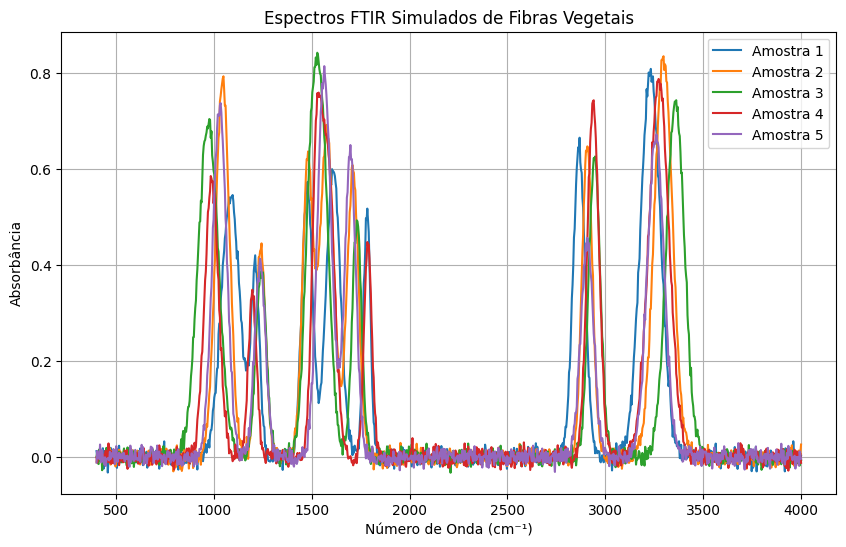

Dados simulados salvos em 'ftir_fibras_naturais.csv'.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configurações
num_amostras = 100  # Número de amostras
num_pontos = 1000   # Número de pontos no eixo x (número de onda)
wave_numbers = np.linspace(400, 4000, num_pontos)  # Faixa de números de onda (400-4000 cm⁻¹)

# Função para criar um pico Gaussiano
def gaussian_peak(x, center, height, width):
    return height * np.exp(-((x - center) ** 2) / (2 * width ** 2))

# Gerar espectros sintéticos
spectra = np.zeros((num_amostras, num_pontos))

# Picos característicos das fibras vegetais (valores médios)
picos_celulose = [(3300, 0.8, 50), (2900, 0.6, 30), (1050, 0.7, 40)]
picos_hemicelulose = [(1730, 0.5, 20), (1240, 0.4, 25)]
picos_lignina = [(1600, 0.6, 35), (1500, 0.5, 30)]

# Incertezas nos picos (desvios padrão)
incerteza_center = 50  # Variação no centro do pico (cm⁻¹)
incerteza_height = 0.1  # Variação na altura do pico
incerteza_width = 5  # Variação na largura do pico (cm⁻¹)

# Variáveis para armazenar as intensidades dos picos
intensidade_celulose = np.zeros(num_amostras)
intensidade_hemicelulose = np.zeros(num_amostras)
intensidade_lignina = np.zeros(num_amostras)

for i in range(num_amostras):
    # Adicionar picos de celulose com incertezas
    for center, height, width in picos_celulose:
        center_ajustado = center + np.random.normal(0, incerteza_center)
        height_ajustado = height + np.random.normal(0, incerteza_height)
        width_ajustado = width + np.random.normal(0, incerteza_width)
        spectra[i] += gaussian_peak(wave_numbers, center_ajustado, height_ajustado, width_ajustado)
        intensidade_celulose[i] += height_ajustado  # Soma das intensidades dos picos de celulose

    # Adicionar picos de hemicelulose com incertezas
    for center, height, width in picos_hemicelulose:
        center_ajustado = center + np.random.normal(0, incerteza_center)
        height_ajustado = height + np.random.normal(0, incerteza_height)
        width_ajustado = width + np.random.normal(0, incerteza_width)
        spectra[i] += gaussian_peak(wave_numbers, center_ajustado, height_ajustado, width_ajustado)
        intensidade_hemicelulose[i] += height_ajustado  # Soma das intensidades dos picos de hemicelulose

    # Adicionar picos de lignina com incertezas
    for center, height, width in picos_lignina:
        center_ajustado = center + np.random.normal(0, incerteza_center)
        height_ajustado = height + np.random.normal(0, incerteza_height)
        width_ajustado = width + np.random.normal(0, incerteza_width)
        spectra[i] += gaussian_peak(wave_numbers, center_ajustado, height_ajustado, width_ajustado)
        intensidade_lignina[i] += height_ajustado  # Soma das intensidades dos picos de lignina

    # Adicionar ruído
    noise = np.random.normal(0, 0.01, num_pontos)  # Ruído aleatório
    spectra[i] += noise

# Gerar propriedades termomecânicas sintéticas com base nas intensidades dos picos
# As propriedades variam de acordo com as intensidades dos picos, refletindo diferenças entre fibras
resistencia_tracao = 50 + intensidade_celulose * 1000  # Resistência à tração (MPa)
modulo_elasticidade = 1 + intensidade_lignina * 50     # Módulo de elasticidade (GPa)
condutividade_termica = 0.1 + intensidade_hemicelulose * 0.4  # Condutividade térmica (W/m·K)

# Plotar alguns espectros
plt.figure(figsize=(10, 6))
for i in range(5):  # Plotar as primeiras 5 amostras
    plt.plot(wave_numbers, spectra[i], label=f"Amostra {i+1}")
plt.title("Espectros FTIR Simulados de Fibras Vegetais")
plt.xlabel("Número de Onda (cm⁻¹)")
plt.ylabel("Absorbância")
plt.legend()
plt.grid()
plt.show()

# Criar DataFrame
df = pd.DataFrame(spectra, columns=[f"wave_{int(w)}" for w in wave_numbers])
df["resistencia_tracao"] = resistencia_tracao
df["modulo_elasticidade"] = modulo_elasticidade
df["condutividade_termica"] = condutividade_termica

# Salvar em CSV
df.to_csv("ftir_fibras_naturais.csv", index=False)
print("Dados simulados salvos em 'ftir_fibras_naturais.csv'.")

**Explicação das Melhorias**



**1.   Incertezas nos Picos:**
  
  * Os valores de center, height e width dos picos foram ajustados com uma variação aleatória (distribuição normal) para simular diferenças entre fibras vegetais.
  * Isso reflete a variabilidade natural das fibras, como coco, sisal, juta, curauá, bambu, etc.

**2. Propriedades Termomecânicas Correlacionadas:**

  * As propriedades termomecânicas (`resistencia_tracao`, `modulo_elasticidade`, `condutividade_termica`) foram geradas com base nas intensidades dos picos, que agora variam devido às incertezas.
  * Isso garante que as propriedades sejam diferentes para cada amostra, refletindo as características das fibras.

**3. Ruído Adicional:**

  * O ruído foi mantido para simular variações experimentais nos espectros.

---

**Resultado Esperado**

* Os espectros FTIR agora têm picos com variações em center, height e width, simulando diferentes tipos de fibras vegetais.
* As propriedades termomecânicas estão diretamente relacionadas às características dos espectros, permitindo que modelos de aprendizado de máquina identifiquem padrões e façam predições.
---

**Próximos Passos**

1.   Pré-processamento:

  * Aplique técnicas como SNV (Standard Normal Variate) ou derivadas para melhorar a qualidade dos espectros.

2.   Modelagem:
  * Use algoritmos de regressão (como PLSR, Random Forest, ou redes neurais) para prever as propriedades termomecânicas a partir dos espectros.
3. Validação:

  * Avalie o desempenho do modelo com métricas como R² e RMSE.